# 1. Loading Pre-Trained BERT

In [4]:
!pip install transformers

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [5]:
import torch
from transformers import BertTokenizer, BertModel

# OPTIONAL: if you want to have more information on what's happening, activate the logger as follows
import matplotlib.pyplot as plt
#matplotlib inline

# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')


## 2.2. Tokenization

BERT provides its own tokenizer, which we imported above. Let's see how it handles the below sentence.

In [6]:
s1="Here is the sentence I want embeddings for."


In [7]:
markedtext="[CLS]" + str(s1) +"[SEP]"
print(markedtext)

[CLS]Here is the sentence I want embeddings for.[SEP]


In [8]:
len(markedtext)

53

In [9]:
list(tokenizer.vocab.keys())[5000:5020]

['knight',
 'lap',
 'survey',
 'ma',
 '##ow',
 'noise',
 'billy',
 '##ium',
 'shooting',
 'guide',
 'bedroom',
 'priest',
 'resistance',
 'motor',
 'homes',
 'sounded',
 'giant',
 '##mer',
 '150',
 'scenes']

In [10]:
tokenized_text = tokenizer.tokenize(markedtext)
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
print(tokenized_text)

['[CLS]', 'here', 'is', 'the', 'sentence', 'i', 'want', 'em', '##bed', '##ding', '##s', 'for', '.', '[SEP]']


In [11]:
for tup in zip(tokenized_text, indexed_tokens):
    print('{:<12} {:>6,}'.format(tup[0], tup[1]))

[CLS]           101
here          2,182
is            2,003
the           1,996
sentence      6,251
i             1,045
want          2,215
em            7,861
##bed         8,270
##ding        4,667
##s           2,015
for           2,005
.             1,012
[SEP]           102


In [12]:
x=indexed_tokens
segments_ids = [1] * len(x)
tokens_tensor = torch.tensor([x])
segments_tensors = torch.tensor([segments_ids])
model = BertModel.from_pretrained('bert-base-uncased',output_hidden_states = True, )# Whether the model returns all hidden-states.
model.eval()
with torch.no_grad():
      outputs = model(tokens_tensor, segments_tensors) #collect all of the hidden states
      hidden_states = outputs[2]


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [13]:
print ("Number of layers:", len(hidden_states), "  (initial embeddings + 12 BERT layers)")
layer_i = 0

print ("Number of batches:", len(hidden_states[layer_i]))
batch_i = 0

print ("Number of tokens:", len(hidden_states[layer_i][batch_i]))
token_i = 0

print ("Number of hidden units:", len(hidden_states[layer_i][batch_i][token_i]))

Number of layers: 13   (initial embeddings + 12 BERT layers)
Number of batches: 1
Number of tokens: 14
Number of hidden units: 768


In [14]:
# For the 5th token in our sentence, select its feature values from layer 5.
token_i = 5
layer_i = 5
vec = hidden_states[layer_i][batch_i][token_i]
print(vec)

tensor([ 7.8696e-01,  6.2387e-01, -1.6974e-01,  4.5611e-01,  7.1318e-01,
        -5.7088e-01, -8.3605e-02,  4.7158e-01,  2.0237e-01,  8.9581e-03,
        -3.5636e-01,  1.3376e-01,  2.5938e-01, -8.0277e-01, -5.0341e-01,
         2.9733e-01,  1.8127e-01,  5.1369e-01, -3.1813e-01,  5.7471e-01,
         5.7074e-01, -1.2571e+00, -1.1328e+00,  5.9986e-01,  1.7268e-01,
         4.2187e-01, -1.1868e-01,  6.5921e-02, -4.9897e-01, -1.6681e-01,
         1.5422e-02,  3.0892e-01, -3.8183e-01, -5.3568e-01, -1.1757e+00,
         3.4814e-01, -2.7119e-02, -3.1909e-01, -1.6332e+00, -2.0592e-01,
         2.5933e-01, -8.3406e-01, -1.0996e-01, -6.2058e-01, -1.3572e-01,
         7.6988e-01, -3.9337e-01, -3.3306e-01, -1.5135e-02, -1.3417e+00,
        -8.5331e-02,  1.3707e-01, -1.8980e-01, -4.6689e-01,  2.3039e-01,
         3.9298e-01,  1.1307e+00, -2.2302e-01,  4.0960e-01, -4.2997e-01,
        -3.3473e-01,  8.6628e-01, -4.3356e-01,  2.8195e-02,  1.2056e+00,
         3.3426e-01, -1.3045e+00,  6.9633e-01,  2.3

Current dimensions:

[layers, batchs, tokens, features]
Expected dimensions:

[tokens, layers, features]

In [15]:
token_embeddings = torch.stack(hidden_states, dim=0) ## Concatenate the tensors for all layers.
token_embeddings.size()

torch.Size([13, 1, 14, 768])

In [16]:
# Remove dimension 1, the "batches".
token_embeddings = torch.squeeze(token_embeddings, dim=1)

token_embeddings.size()

torch.Size([13, 14, 768])

In [17]:
# Swap dimensions 0 and 1.
token_embeddings = token_embeddings.permute(1,0,2)

token_embeddings.size()

torch.Size([14, 13, 768])

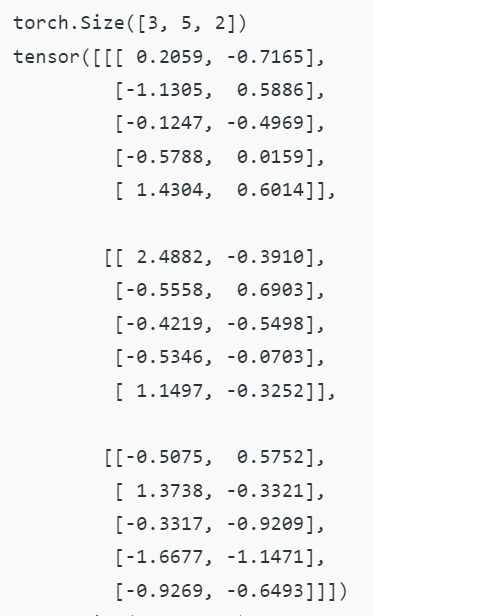

In [19]:

token_i = 5
layer_i = 5
vec = token_embeddings[5][5]
print(vec)

tensor([ 7.8696e-01,  6.2387e-01, -1.6974e-01,  4.5611e-01,  7.1318e-01,
        -5.7088e-01, -8.3605e-02,  4.7158e-01,  2.0237e-01,  8.9581e-03,
        -3.5636e-01,  1.3376e-01,  2.5938e-01, -8.0277e-01, -5.0341e-01,
         2.9733e-01,  1.8127e-01,  5.1369e-01, -3.1813e-01,  5.7471e-01,
         5.7074e-01, -1.2571e+00, -1.1328e+00,  5.9986e-01,  1.7268e-01,
         4.2187e-01, -1.1868e-01,  6.5921e-02, -4.9897e-01, -1.6681e-01,
         1.5422e-02,  3.0892e-01, -3.8183e-01, -5.3568e-01, -1.1757e+00,
         3.4814e-01, -2.7119e-02, -3.1909e-01, -1.6332e+00, -2.0592e-01,
         2.5933e-01, -8.3406e-01, -1.0996e-01, -6.2058e-01, -1.3572e-01,
         7.6988e-01, -3.9337e-01, -3.3306e-01, -1.5135e-02, -1.3417e+00,
        -8.5331e-02,  1.3707e-01, -1.8980e-01, -4.6689e-01,  2.3039e-01,
         3.9298e-01,  1.1307e+00, -2.2302e-01,  4.0960e-01, -4.2997e-01,
        -3.3473e-01,  8.6628e-01, -4.3356e-01,  2.8195e-02,  1.2056e+00,
         3.3426e-01, -1.3045e+00,  6.9633e-01,  2.3

In [20]:
# Stores the token vectors, with shape [22 x 3,072]
token_vecs_cat = []
# For each token in the sentence...
for token in token_embeddings:
  # Concatenate the vectors (that is, append them together) from the last four layers.
      cat_vec = torch.cat((token[-1], token[-2], token[-3], token[-4]), dim=0)
      token_vecs_cat.append(cat_vec)



In [21]:
from scipy.spatial.distance import cosine
print(s1)
sim = 1 - cosine(token_vecs_cat[0][:5], token_vecs_cat[0][:5])
print("Simlarity",sim)
sim = 1 - cosine(token_vecs_cat[0][:5], token_vecs_cat[1][:5])
print("Simlarity",sim)
sim = 1 - cosine(token_vecs_cat[0][:5], token_vecs_cat[2][:5])
print("Simlarity",sim)


Here is the sentence I want embeddings for.
Simlarity 0.9999999886957566
Simlarity 0.009555998568397839
Simlarity 0.36433308881798143


Sentence Vectors
To get a single vector for our entire sentence , simple approach is to average the second to last hiden layer of each token producing a single 768 length vector.

In [22]:
token_vecs = hidden_states[-2][0]

# Calculate the average of all 14 token vectors.
sentence_embedding = torch.mean(token_vecs, dim=0)
print(sentence_embedding)

tensor([-9.9442e-03, -2.7320e-01, -1.0416e-02, -4.8408e-02, -2.4751e-01,
         1.1913e-01,  1.9533e-02,  2.8248e-01,  1.1620e-01, -2.1753e-01,
         2.4466e-01, -2.3544e-01, -1.6913e-01,  3.7600e-01, -1.2743e-01,
         5.6478e-01, -4.5477e-01, -1.2037e-01,  8.3875e-02, -2.8571e-01,
         3.4982e-01,  5.2320e-01, -2.6038e-01,  7.4175e-02,  3.8148e-01,
        -1.8716e-01, -2.8962e-01, -1.8415e-01, -4.0923e-01,  1.3315e-01,
         5.6989e-02,  4.4572e-01, -1.2435e-01, -7.3319e-01, -5.2622e-02,
        -1.9146e-01,  1.0511e-01, -4.9102e-01,  3.6276e-03,  1.8093e-01,
        -5.8329e-01, -2.6246e-01,  3.3072e-01, -3.4976e-01, -2.0046e-02,
         5.6812e-02, -3.7972e-01, -4.2707e-01, -9.7794e-02, -2.8231e-01,
        -1.0038e+00,  3.3511e-01,  1.4283e-01,  1.1072e-01, -1.5746e-01,
         5.4902e-01,  3.1724e-01, -5.6094e-01,  5.5646e-01,  1.6802e-01,
        -3.6458e-01,  2.1330e-01,  1.4355e-01,  7.2790e-02,  4.3484e-01,
         1.7681e-02, -3.7133e-02,  5.3519e-02, -6.0